In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
pd.set_option('display.max_columns',None)

In [13]:
train=pd.read_csv('train.csv')

In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train.shape

(1460, 81)

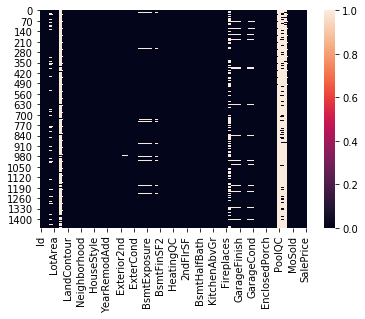

In [16]:
sns.heatmap(train.isnull())

In Data analysis we will analyze to find out below stuffs:
1. Missing values
2. Numerical values
3. Distribution of numerical values

4. Categorical values
5. Cardinality of Categorical Variables
6. Ouliers

7. Relationship between independent and dependent feature(SalePrice)

In [29]:
features_withna=[columns for columns in train.columns if train[columns].isnull().sum()>0]
for columns in features_withna:
    a=train[columns].isnull().sum()
    total=np.round(a/len(train[columns]),4)
    print("Missing values in ",columns,"are",total,"%")

Missing values in  LotFrontage are 0.1774 %
Missing values in  Alley are 0.9377 %
Missing values in  MasVnrType are 0.0055 %
Missing values in  MasVnrArea are 0.0055 %
Missing values in  BsmtQual are 0.0253 %
Missing values in  BsmtCond are 0.0253 %
Missing values in  BsmtExposure are 0.026 %
Missing values in  BsmtFinType1 are 0.0253 %
Missing values in  BsmtFinType2 are 0.026 %
Missing values in  Electrical are 0.0007 %
Missing values in  FireplaceQu are 0.4726 %
Missing values in  GarageType are 0.0555 %
Missing values in  GarageYrBlt are 0.0555 %
Missing values in  GarageFinish are 0.0555 %
Missing values in  GarageQual are 0.0555 %
Missing values in  GarageCond are 0.0555 %
Missing values in  PoolQC are 0.9952 %
Missing values in  Fence are 0.8075 %
Missing values in  MiscFeature are 0.963 %


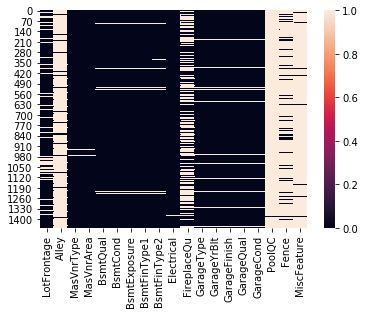

In [32]:
sns.heatmap(train[features_withna].isnull())

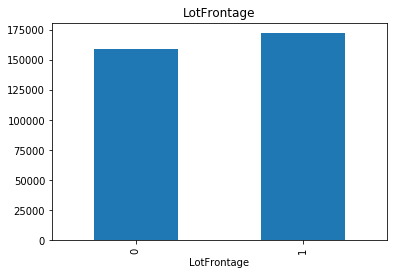

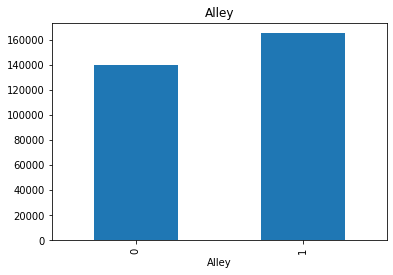

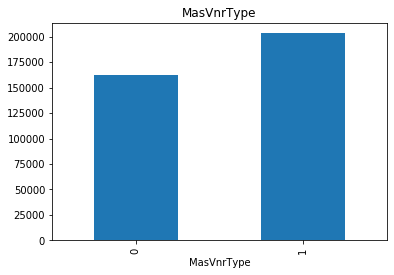

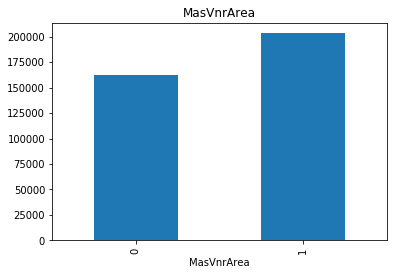

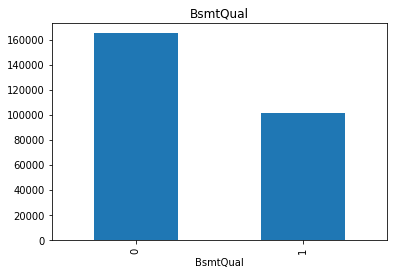

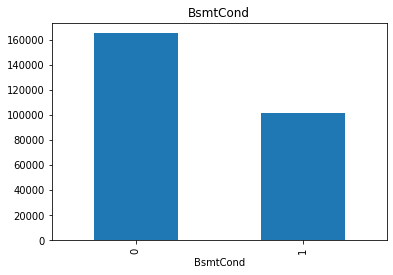

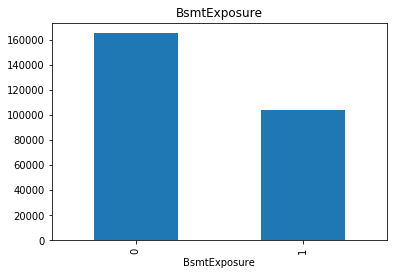

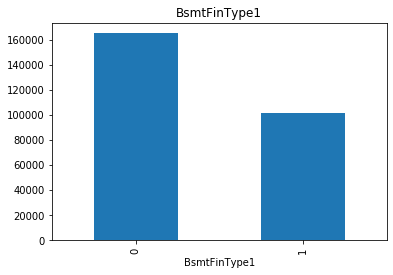

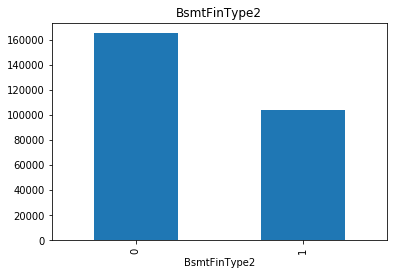

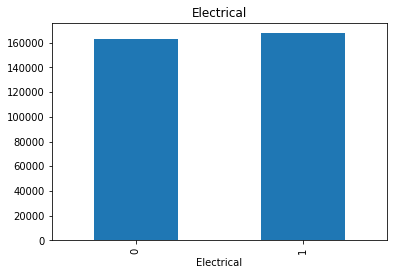

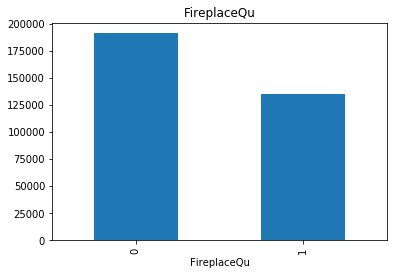

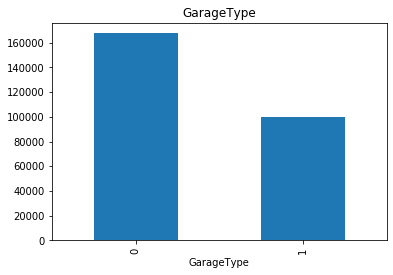

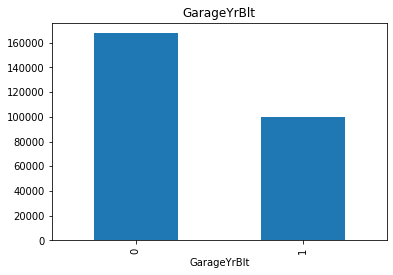

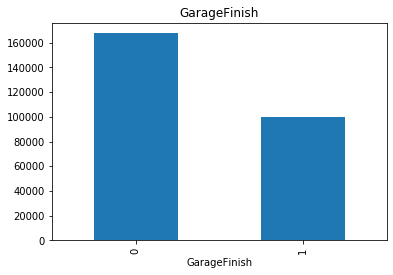

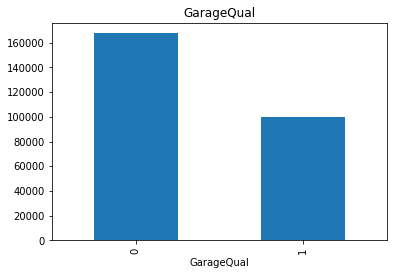

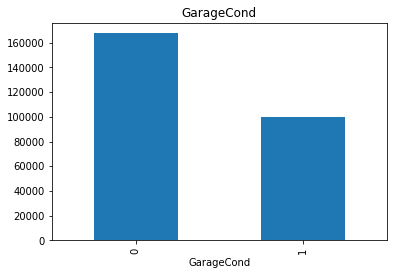

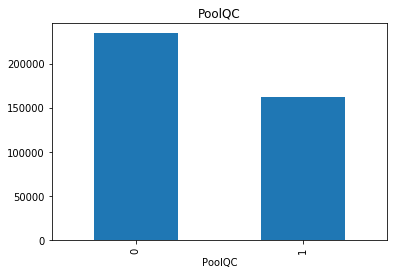

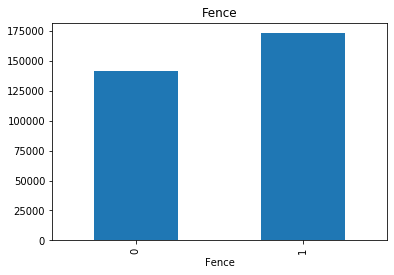

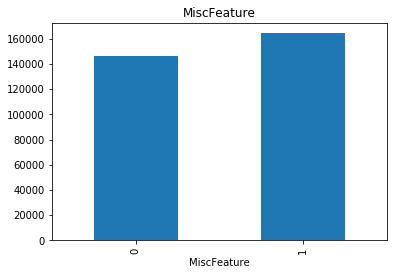

In [102]:
for feature in features_withna:
    data=train.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    pl.title(feature)
    pl.show()

For most of the features, Sale Price is playing independent roles with
respect to null values

In [124]:
data=train.copy()

In [134]:
numeric_features=[columns for columns in data.columns if data[columns].dtype!='O']
print("number of numeric values are",len(numeric_features))
data[numeric_features].head()

number of numeric values are 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [143]:
pd.Series(['A']).dtype,pd.Series([1]).dtype,pd.Series([0.5]).dtype,

(dtype('O'), dtype('int64'), dtype('float64'))

In [165]:
features_with_year=[columns for columns in numeric_features if 'Yr' in columns or 'Year' in columns or 'yr' in columns or 'year' in columns]
features_with_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [168]:
for feature in features_with_year:
    print(feature,np.unique(data[feature]))

YearBuilt [1872 1875 1880 1882 1885 1890 1892 1893 1898 1900 1904 1905 1906 1908
 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 1924 1925 1926 1927 1928 1929 1930 1931 1932 1934 1935 1936 1937 1938
 1939 1940 1941 1942 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]
YearRemodAdd [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]
GarageYrBlt [1900. 1906. 1908. 1910. 1914. 1915. 1916. 1918. 1920. 1921. 1922. 1923.
 1924. 1925.

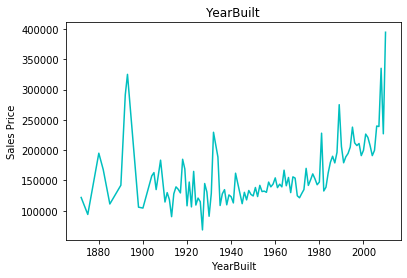

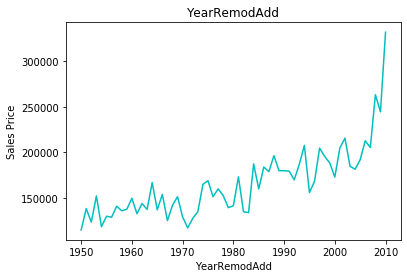

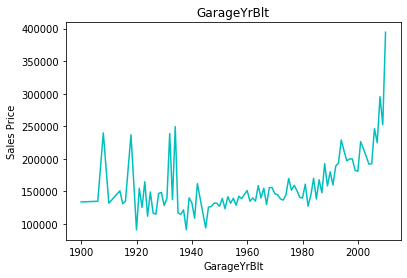

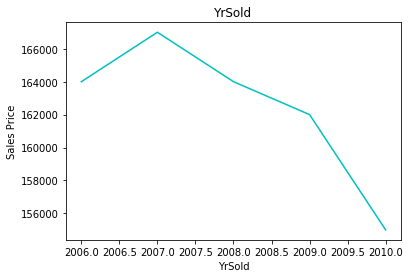

In [179]:
for features in features_with_year:
    data.groupby(features)['SalePrice'].median().plot(color='c')
    pl.ylabel("Sales Price")
    pl.title(features)
    pl.show()

136


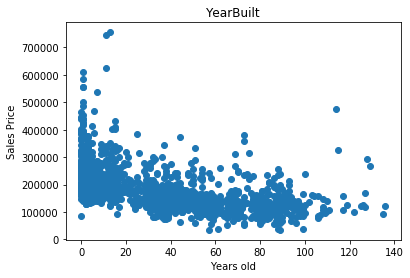

60


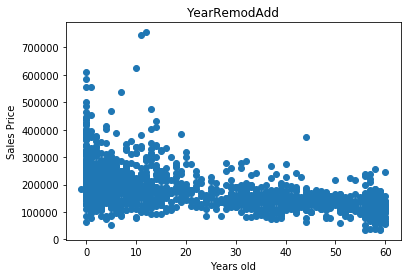

107.0


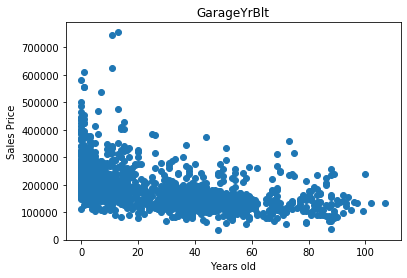

In [195]:
for features in features_with_year:
    if features != 'YrSold':
        temp=train.copy()
        temp[feature]=temp['YrSold']-temp[features]
        pl.scatter(temp[feature],temp['SalePrice'])
        pl.title(features)
        print(np.max(temp[feature]))
        pl.ylabel("Sales Price")
        pl.xlabel("Years old")
        pl.show()

In [180]:
train[features_with_year]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010
